In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [ ]:
#1. Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# 2. Read file MSN
df = pd.read_csv('VNM.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing, and validation arcording to 7:2:1

In [ ]:

train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 10s 349ms/step - loss: 0.0764 - val_loss: 0.0043
Epoch 2/100
13/13 [==============================] - 2s 175ms/step - loss: 0.0148 - val_loss: 0.0188
Epoch 3/100
13/13 [==============================] - 2s 171ms/step - loss: 0.0080 - val_loss: 0.0068
Epoch 4/100
13/13 [==============================] - 2s 172ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 5/100
13/13 [==============================] - 2s 170ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 6/100
13/13 [==============================] - 3s 216ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 7/100
13/13 [==============================] - 3s 250ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 8/100
13/13 [==============================] - 2s 172ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 9/100
13/13 [==============================] - 2s 171ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 10/100
13/13 [==============================] - 2s 172ms/step - loss: 0.0033 - val_l

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 55ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val, yval, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))


mae_test = mean_absolute_error(ytest, y_pred)
mae_val = mean_absolute_error(yval, y_pred_val)

mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mape_val = np.mean(np.abs((yval - y_pred_val) / yval)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print("Validate MAE: ", mae_val)
print("Test MAE: ", mae_test)
print("Validate MAPE: ", mape_val)
print("Test MAPE: ", mape_test)

Validation RMSE: 883.9145654373217
Testing RMSE: 1080.0039340134558
Validate MAE:  721.6542338709672
Test MAE:  856.371802662037
Validate MAPE:  1.0967412874915716
Test MAPE:  1.2384986747710625


In [ ]:
# 13. Dự báo 90 ngày tiếp theo
x_input=val_data[32:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.14920455]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

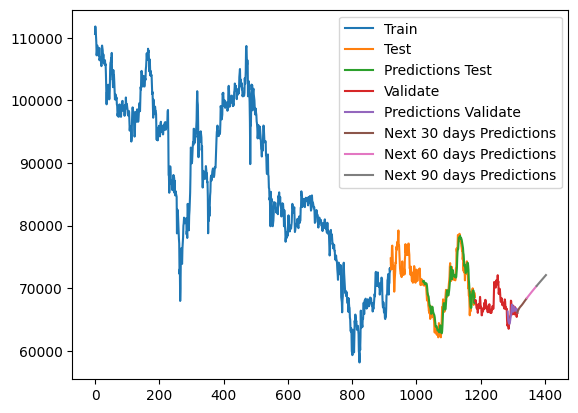

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()

<h1># 4. Split the data into training, testing, and validation arcording to 5:3:2

In [ ]:
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 8s 340ms/step - loss: 0.2318 - val_loss: 0.0551
Epoch 2/100
9/9 [==============================] - 3s 341ms/step - loss: 0.0341 - val_loss: 0.0046
Epoch 3/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0187 - val_loss: 0.0286
Epoch 4/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0104 - val_loss: 0.0156
Epoch 5/100
9/9 [==============================] - 2s 192ms/step - loss: 0.0084 - val_loss: 0.0167
Epoch 6/100
9/9 [==============================] - 2s 189ms/step - loss: 0.0071 - val_loss: 0.0164
Epoch 7/100
9/9 [==============================] - 2s 190ms/step - loss: 0.0064 - val_loss: 0.0120
Epoch 8/100
9/9 [==============================] - 2s 202ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 9/100
9/9 [==============================] - 3s 308ms/step - loss: 0.0055 - val_loss: 0.0082
Epoch 10/100
9/9 [==============================] - 2s 248ms/step - loss: 0.0051 - val_loss: 0.0079
Epoch 11/

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 53ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val, yval, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))


mae_test = mean_absolute_error(ytest, y_pred)
mae_val = mean_absolute_error(yval, y_pred_val)

mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mape_val = np.mean(np.abs((yval - y_pred_val) / yval)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print("Validate MAE: ", mae_val)
print("Test MAE: ", mae_test)
print("Validate MAPE: ", mape_val)
print("Test MAPE: ", mape_test)

Validation RMSE: 3126.8043902682643
Testing RMSE: 3137.7346142524125
Validate MAE:  2872.631077453987
Test MAE:  2643.865155716723
Validate MAPE:  4.279102078113263
Test MAPE:  3.9042243801234577


In [ ]:
# 13. Dự báo 90 ngày tiếp theo
x_input=val_data[164:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.20865172]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

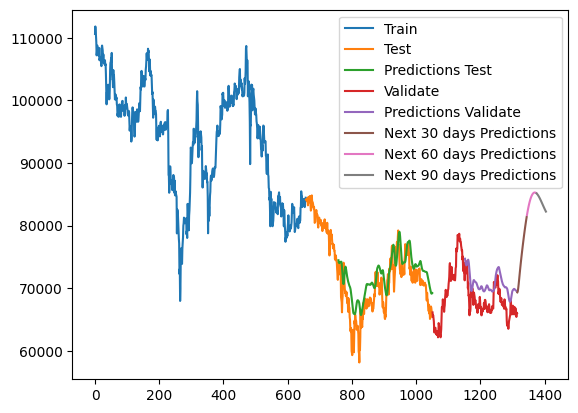

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()


<h1># 4. Split the data into training, testing, and validation arcording to 6:3:1

In [ ]:

train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 332ms/step - loss: 0.1247 - val_loss: 0.0163
Epoch 2/100
11/11 [==============================] - 4s 333ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 3/100
11/11 [==============================] - 2s 182ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 4/100
11/11 [==============================] - 2s 185ms/step - loss: 0.0076 - val_loss: 0.0135
Epoch 5/100
11/11 [==============================] - 2s 188ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 6/100
11/11 [==============================] - 2s 187ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 7/100
11/11 [==============================] - 2s 194ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 8/100
11/11 [==============================] - 4s 329ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 9/100
11/11 [==============================] - 2s 186ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 10/100
11/11 [==============================] - 2s 187ms/step - loss: 0.0036 - val_lo

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 281ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val, yval, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))


mae_test = mean_absolute_error(ytest, y_pred)
mae_val = mean_absolute_error(yval, y_pred_val)

mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mape_val = np.mean(np.abs((yval - y_pred_val) / yval)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print("Validate MAE: ", mae_val)
print("Test MAE: ", mae_test)
print("Validate MAPE: ", mape_val)
print("Test MAPE: ", mape_test)

Validation RMSE: 1342.9494812277092
Testing RMSE: 1765.2633722580279
Validate MAE:  1017.2440776209668
Test MAE:  1430.136484108361
Validate MAPE:  1.5554032298253675
Test MAPE:  2.0258186857943525


In [ ]:
# 13. Dự báo 90 ngày tiếp theo
x_input=val_data[32:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.15686877]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

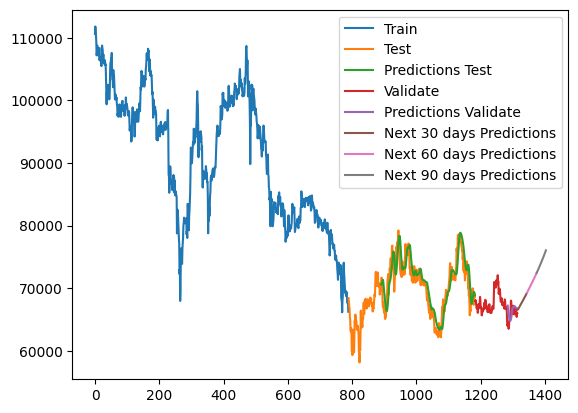

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()